In [7]:
!pip install scikit-learn
!python.exe -m pip install --upgrade pip
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [11]:
data = pd.read_csv('Location Intelligence Cybersecurity 2025.csv')

In [39]:
data

,ID,Latitude,Longitude,Location Type,Elevation (m),Population Density (people/km²),Temperature (°C),Humidity (%),Rainfall (mm),Infrastructure Type,Air Quality Index (AQI),Traffic Flow (vehicles/hour),Public Transport Station,Cyber Attack Type,IoT Device Category,IoT Device Type
0,1,63.996857,69.376172,Railway,476.214325,5657,43.757206,98.085756,182.458056,Dam,463,2273,Metro Station,Ransomware,Industrial Iot,Robotic Arm
1,2,-67.699789,-146.069812,Gas Station,1656.296531,3205,-23.622018,98.660605,197.321012,Dam,195,3982,Bus Stop,Phishing,Smart Home,Security Camera
2,3,-71.474630,114.072906,Railway,2597.677830,4823,-0.330369,88.579608,101.660199,Bridge,177,4301,Bus Stop,Malware,Smart Home,Voice Assistant
3,4,84.330924,-128.608308,Hospital,4567.102082,6567,-12.576073,36.781258,237.426095,Sewage System,426,2898,Bus Stop,Session Hijacking,Smart City,Traffic Sensor
4,5,-66.897950,-153.692373,River,945.983920,5684,18.683985,61.636885,100.543584,Sewage System,145,4884,NaN,Trojan Horse,Smart Home,Smart Door Lock
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65445,65446,-63.544702,-8.388961,Social Network Data,619.264560,6982,-24.144297,25.775011,63.465992,Data Center,236,2020,Metro Station,Cross-Site Scripting (Xss),Industrial Iot,Iot Sensor
65446,65447,-89.905896,-139.750598,Social Network Data,1911.577267,3691,12.536695,54.427580,132.943330,Data Center,405,4630,Metro Station,Ransomware,Smart Home,Voice Assistant
65447,65448,-69.709313,113.958146,Social Network Data,2446.102138,2750,-4.905564,23.783806,141.010803,Cell Tower,127,901,Bus Stop,Phishing,Smart City,Environmental Sensor
65448,65449,31.806423,-178.735963,Social Network Data,3188.839480,7447,35.112467,72.602639,201.282524,Cell Tower,460,311,Bus Stop,Zero-Day Exploit,Smart Home,Security Camera


In [40]:
data.head(20)

,ID,Latitude,Longitude,Location Type,Elevation (m),Population Density (people/km²),Temperature (°C),Humidity (%),Rainfall (mm),Infrastructure Type,Air Quality Index (AQI),Traffic Flow (vehicles/hour),Public Transport Station,Cyber Attack Type,IoT Device Category,IoT Device Type
0,1,63.996857,69.376172,Railway,476.214325,5657,43.757206,98.085756,182.458056,Dam,463,2273,Metro Station,Ransomware,Industrial Iot,Robotic Arm
1,2,-67.699789,-146.069812,Gas Station,1656.296531,3205,-23.622018,98.660605,197.321012,Dam,195,3982,Bus Stop,Phishing,Smart Home,Security Camera
2,3,-71.474630,114.072906,Railway,2597.677830,4823,-0.330369,88.579608,101.660199,Bridge,177,4301,Bus Stop,Malware,Smart Home,Voice Assistant
3,4,84.330924,-128.608308,Hospital,4567.102082,6567,-12.576073,36.781258,237.426095,Sewage System,426,2898,Bus Stop,Session Hijacking,Smart City,Traffic Sensor
4,5,-66.897950,-153.692373,River,945.983920,5684,18.683985,61.636885,100.543584,Sewage System,145,4884,NaN,Trojan Horse,Smart Home,Smart Door Lock
5,6,47.380965,22.525676,Road,4470.563487,1711,47.795755,64.462220,0.473137,Bridge,104,1756,Metro Station,Trojan Horse,Wearable,Smartwatch
6,7,-66.552378,111.564146,Road,4767.466592,6970,-14.480622,76.705796,113.950198,Power Line,132,3247,Bus Stop,Cross-Site Scripting (Xss),Healthcare Iot,Iot-Connected Ecg
7,8,-11.885086,-131.992043,Road,4713.538270,2885,25.218296,91.940202,46.716897,Bridge,390,882,Metro Station,Malware,Industrial Iot,Factory Gateway
8,9,21.547083,-21.069811,Forest,918.462497,3127,-26.835020,10.599576,60.925655,Power Line,8,825,Bus Stop,Social Engineering,Healthcare Iot,Remote Patient Monitor
9,10,-54.413781,97.421668,Gas Station,1954.839219,9261,-13.902093,77.205260,265.077080,Sewage System,232,3059,Bus Stop,Social Engineering,Smart City,Environmental Sensor


In [44]:
data.tail(20)

,ID,Latitude,Longitude,Location Type,Elevation (m),Population Density (people/km²),Temperature (°C),Humidity (%),Rainfall (mm),Infrastructure Type,Air Quality Index (AQI),Traffic Flow (vehicles/hour),Public Transport Station,Cyber Attack Type,IoT Device Category,IoT Device Type
65430,65431,-85.750107,-140.747120,Social Network Data,1504.793101,1836,28.786911,71.938720,230.098867,Cell Tower,20,786,NaN,Trojan Horse,Smart City,Environmental Sensor
65431,65432,-33.312388,-173.874550,Social Network Data,1942.711606,4427,-5.075346,63.236665,74.241709,Data Center,302,1012,Metro Station,Zero-Day Exploit,Wearable,Medical Sensor
65432,65433,-83.714428,-73.788861,Social Network Data,2176.425391,6419,2.946272,62.411083,13.609431,Cell Tower,484,1649,Bus Stop,Phishing,Smart Home,Voice Assistant
65433,65434,-3.124796,78.766304,Social Network Data,928.393316,7525,21.439927,95.850750,257.481990,Data Center,156,588,Metro Station,Sql Injection,Healthcare Iot,Iot-Connected Ecg
65434,65435,71.656721,-33.766093,Social Network Data,3735.098341,512,-24.682532,83.925753,110.636967,Data Center,300,3099,Metro Station,Session Hijacking,Smart Home,Security Camera
65435,65436,-6.466295,49.778240,Social Network Data,2965.361966,9403,-6.440737,22.158693,33.874393,Data Center,274,466,Bus Stop,Ddos,Smart Home,Smart Door Lock
65436,65437,-33.141396,-112.697813,Social Network Data,1149.891984,6616,-3.561401,93.401024,87.551209,Cell Tower,113,1947,Metro Station,Dns Spoofing,Healthcare Iot,Remote Patient Monitor
65437,65438,-45.513805,-67.932507,Social Network Data,456.788636,8555,30.563076,84.950582,246.688471,Cell Tower,329,4079,Bus Stop,Ddos,Healthcare Iot,Smart Glucose Meter
65438,65439,-5.912593,-177.198436,Social Network Data,4204.359424,624,21.453708,32.635807,5.440389,Cell Tower,410,3280,NaN,Phishing,Healthcare Iot,Remote Patient Monitor
65439,65440,76.308178,-6.785459,Social Network Data,2238.348515,4339,47.110226,36.509609,202.190852,Data Center,427,1215,Metro Station,Spyware,Industrial Iot,Robotic Arm


In [45]:
data.shape

(65450, 16)

In [46]:
data['Humidity (%)'] = pd.to_numeric(data['Humidity (%)'], errors='coerce')

In [47]:
import seaborn as sns

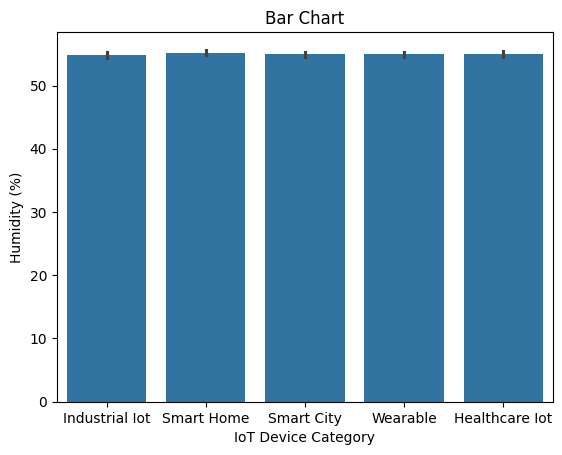

In [48]:
sns.barplot(x='IoT Device Category', y='Humidity (%)', data=data)

plt.title("Bar Chart")
plt.show()

In [49]:
print(data.head())

   ID   Latitude   Longitude Location Type  Elevation (m)  \
0   1  63.996857   69.376172       Railway     476.214325   
1   2 -67.699789 -146.069812   Gas Station    1656.296531   
2   3 -71.474630  114.072906       Railway    2597.677830   
3   4  84.330924 -128.608308      Hospital    4567.102082   
4   5 -66.897950 -153.692373         River     945.983920   

   Population Density (people/km²)  Temperature (°C)  Humidity (%)  \
0                             5657         43.757206     98.085756   
1                             3205        -23.622018     98.660605   
2                             4823         -0.330369     88.579608   
3                             6567        -12.576073     36.781258   
4                             5684         18.683985     61.636885   

   Rainfall (mm) Infrastructure Type  Air Quality Index (AQI)  \
0     182.458056                 Dam                      463   
1     197.321012                 Dam                      195   
2     101.660199 

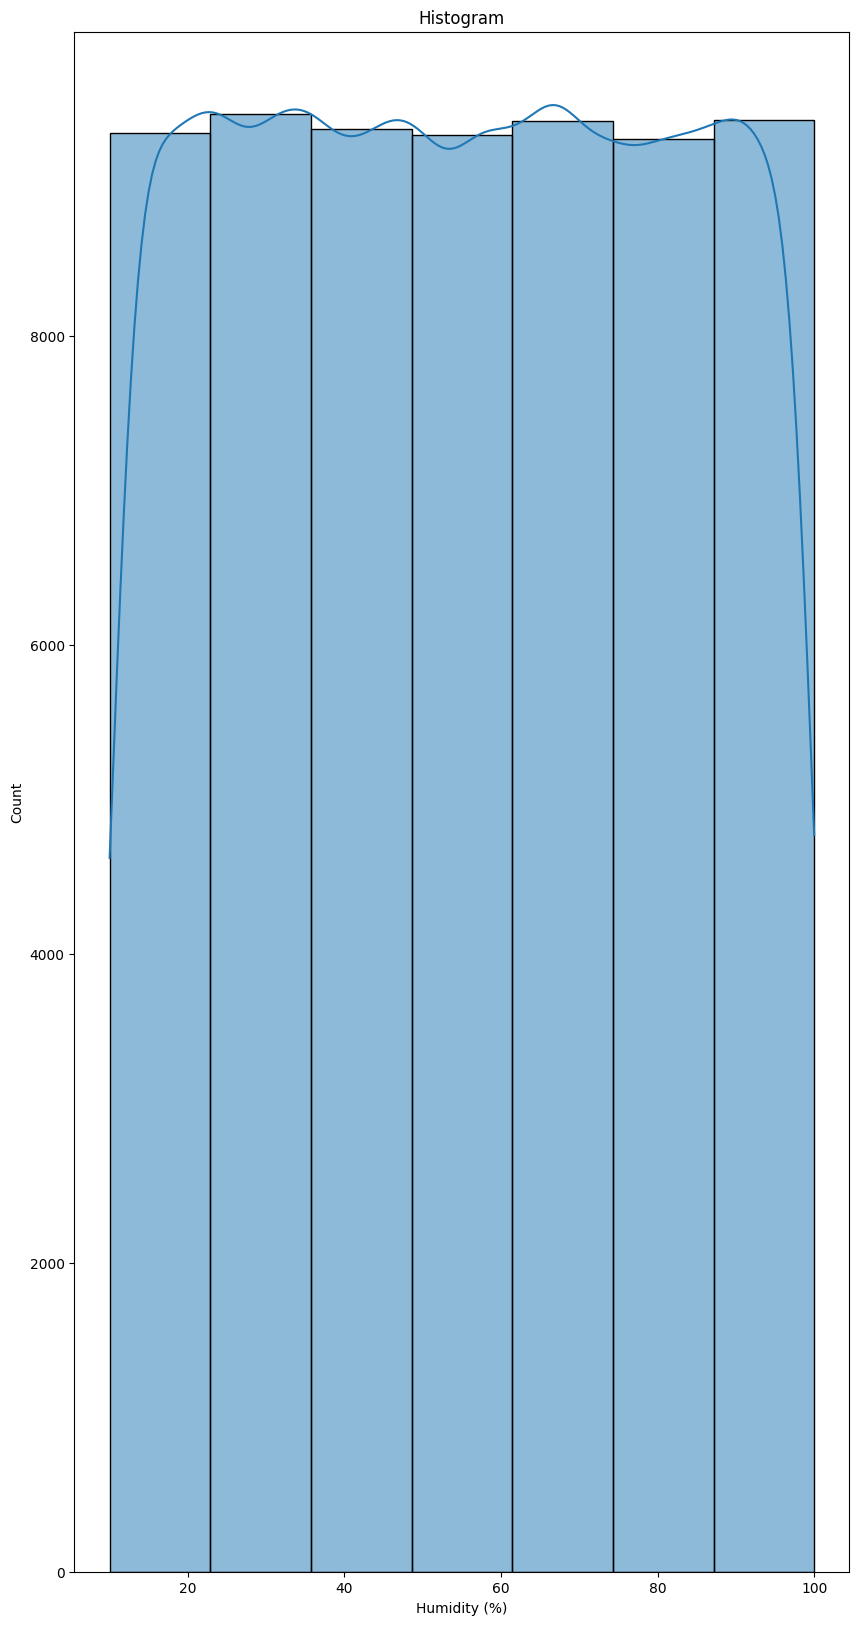

In [50]:
plt.figure(figsize=(10, 20))
sns.histplot(data['Humidity (%)'], bins=7, kde=True)
plt.title("Histogram")
plt.show()

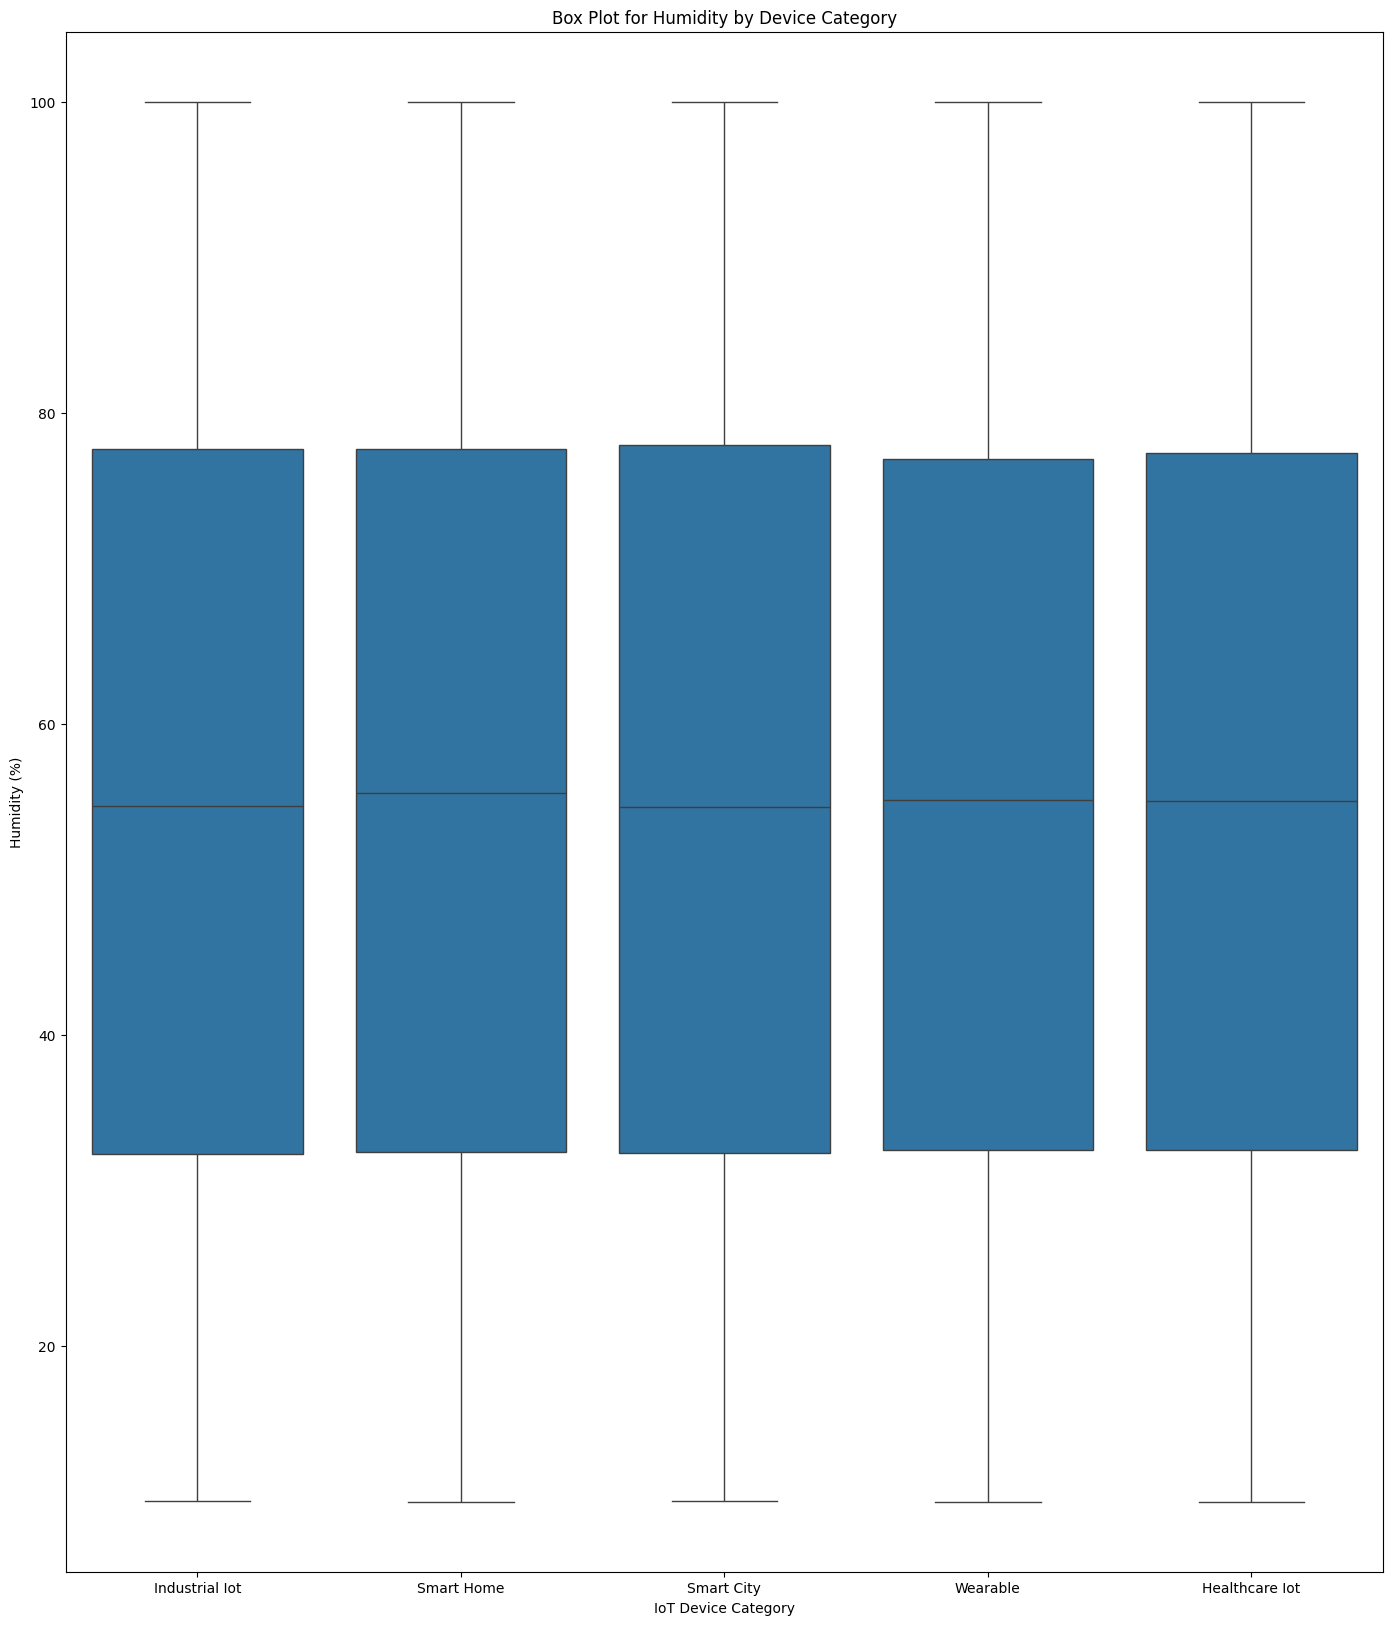

In [51]:
plt.figure(figsize=(17, 20))

sns.boxplot(x='IoT Device Category', y='Humidity (%)', data=data)

plt.title('Box Plot for Humidity by Device Category')
plt.show()

In [52]:
data.isnull().sum()

ID                                     0
Latitude                               0
Longitude                              0
Location Type                          0
Elevation (m)                          0
Population Density (people/km²)        0
Temperature (°C)                       0
Humidity (%)                           0
Rainfall (mm)                          0
Infrastructure Type                    0
Air Quality Index (AQI)                0
Traffic Flow (vehicles/hour)           0
Public Transport Station           21824
Cyber Attack Type                      0
IoT Device Category                    0
IoT Device Type                        0
dtype: int64

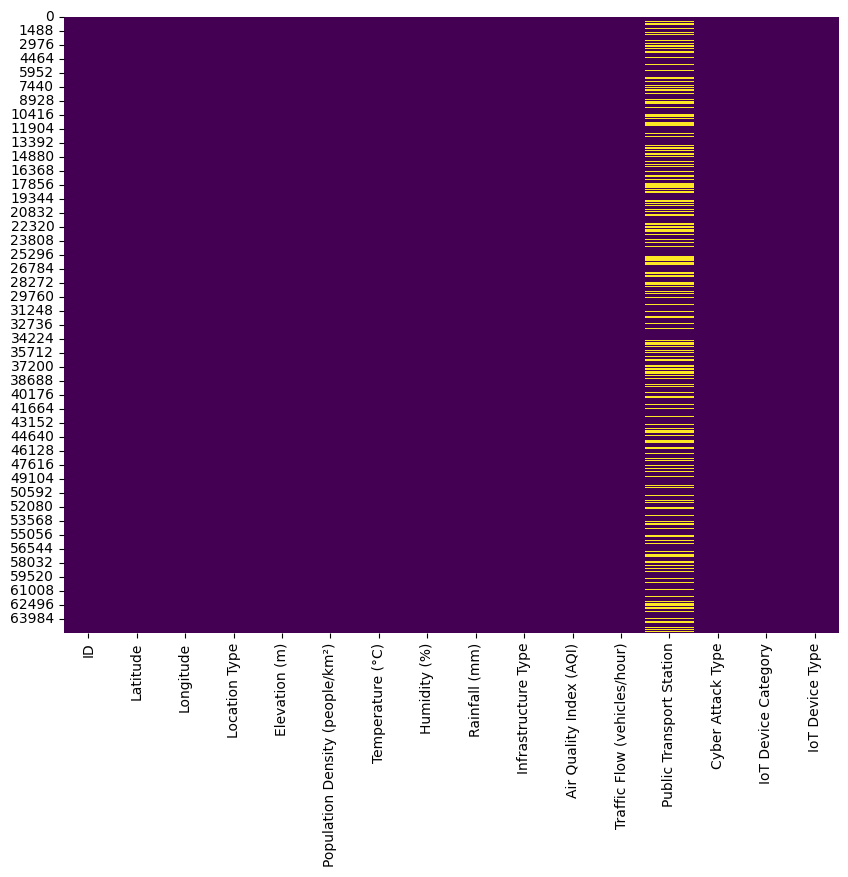

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

sns.heatmap(data.isnull(), cbar=False, cmap='viridis')

plt.show()

In [54]:
data = pd.read_csv('Location Intelligence Cybersecurity 2025.csv')
data.head()

,ID,Latitude,Longitude,Location Type,Elevation (m),Population Density (people/km²),Temperature (°C),Humidity (%),Rainfall (mm),Infrastructure Type,Air Quality Index (AQI),Traffic Flow (vehicles/hour),Public Transport Station,Cyber Attack Type,IoT Device Category,IoT Device Type
0,1,63.996857,69.376172,Railway,476.214325,5657,43.757206,98.085756,182.458056,Dam,463,2273,Metro Station,Ransomware,Industrial Iot,Robotic Arm
1,2,-67.699789,-146.069812,Gas Station,1656.296531,3205,-23.622018,98.660605,197.321012,Dam,195,3982,Bus Stop,Phishing,Smart Home,Security Camera
2,3,-71.474630,114.072906,Railway,2597.677830,4823,-0.330369,88.579608,101.660199,Bridge,177,4301,Bus Stop,Malware,Smart Home,Voice Assistant
3,4,84.330924,-128.608308,Hospital,4567.102082,6567,-12.576073,36.781258,237.426095,Sewage System,426,2898,Bus Stop,Session Hijacking,Smart City,Traffic Sensor
4,5,-66.897950,-153.692373,River,945.983920,5684,18.683985,61.636885,100.543584,Sewage System,145,4884,NaN,Trojan Horse,Smart Home,Smart Door Lock


In [55]:

data['Public Transport Station'] = data['Public Transport Station'].fillna(data['Public Transport Station'].mode()[0])

print(data.isnull().sum())

ID                                 0
Latitude                           0
Longitude                          0
Location Type                      0
Elevation (m)                      0
Population Density (people/km²)    0
Temperature (°C)                   0
Humidity (%)                       0
Rainfall (mm)                      0
Infrastructure Type                0
Air Quality Index (AQI)            0
Traffic Flow (vehicles/hour)       0
Public Transport Station           0
Cyber Attack Type                  0
IoT Device Category                0
IoT Device Type                    0
dtype: int64


In [56]:
data.duplicated().sum()

np.int64(0)

In [57]:
data['Is_High_Traffic'] = 0
data.loc[data['Traffic Flow (vehicles/hour)'] > 5000, 'Is_High_Traffic'] = 1
print(data[['Traffic Flow (vehicles/hour)', 'Is_High_Traffic']].head(10))

   Traffic Flow (vehicles/hour)  Is_High_Traffic
0                          2273                0
1                          3982                0
2                          4301                0
3                          2898                0
4                          4884                0
5                          1756                0
6                          3247                0
7                           882                0
8                           825                0
9                          3059                0


In [58]:
data.describe()

,ID,Latitude,Longitude,Elevation (m),Population Density (people/km²),Temperature (°C),Humidity (%),Rainfall (mm),Air Quality Index (AQI),Traffic Flow (vehicles/hour),Is_High_Traffic
count,65450.000000,65450.000000,65450.000000,65450.000000,65450.000000,65450.000000,65450.000000,65450.000000,65450.000000,65450.000000,65450.0
mean,32725.500000,-0.180011,0.239843,2504.215454,5017.273705,9.968104,55.000590,150.635604,249.348083,2556.429855,0.0
std,18893.931896,51.945509,103.964846,1442.785286,2874.382630,23.063216,25.985925,86.584375,143.830943,1416.849692,0.0
min,1.000000,-89.996389,-179.999576,0.167683,50.000000,-29.999584,10.001096,0.007370,0.000000,100.000000,0.0
25%,16363.250000,-44.896846,-89.716104,1251.127978,2514.000000,-9.914439,32.479684,75.837946,125.000000,1327.000000,0.0
50%,32725.500000,-0.740356,0.948984,2510.581397,5033.000000,9.818900,55.006033,151.106208,250.000000,2558.000000,0.0
75%,49087.750000,45.040120,90.772651,3752.313467,7503.000000,29.923952,77.514608,225.935219,373.000000,3785.000000,0.0
max,65450.000000,89.998709,179.998723,4999.971845,9999.000000,49.999591,99.999095,299.999257,499.000000,4999.000000,0.0


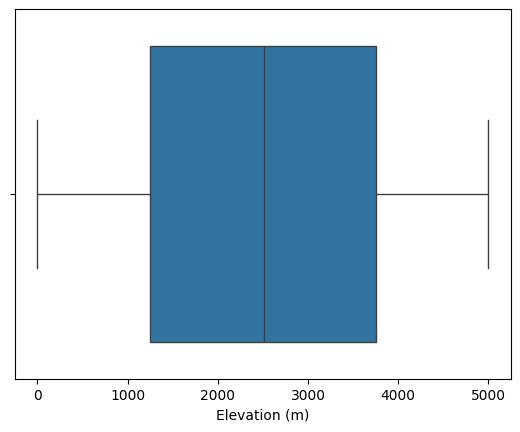

In [59]:
p1=sns.boxplot(x=data['Elevation (m)'])

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65450 entries, 0 to 65449
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               65450 non-null  int64  
 1   Latitude                         65450 non-null  float64
 2   Longitude                        65450 non-null  float64
 3   Location Type                    65450 non-null  object 
 4   Elevation (m)                    65450 non-null  float64
 5   Population Density (people/km²)  65450 non-null  int64  
 6   Temperature (°C)                 65450 non-null  float64
 7   Humidity (%)                     65450 non-null  float64
 8   Rainfall (mm)                    65450 non-null  float64
 9   Infrastructure Type              65450 non-null  object 
 10  Air Quality Index (AQI)          65450 non-null  int64  
 11  Traffic Flow (vehicles/hour)     65450 non-null  int64  
 12  Public Transport S

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65450 entries, 0 to 65449
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               65450 non-null  int64  
 1   Latitude                         65450 non-null  float64
 2   Longitude                        65450 non-null  float64
 3   Location Type                    65450 non-null  object 
 4   Elevation (m)                    65450 non-null  float64
 5   Population Density (people/km²)  65450 non-null  int64  
 6   Temperature (°C)                 65450 non-null  float64
 7   Humidity (%)                     65450 non-null  float64
 8   Rainfall (mm)                    65450 non-null  float64
 9   Infrastructure Type              65450 non-null  object 
 10  Air Quality Index (AQI)          65450 non-null  int64  
 11  Traffic Flow (vehicles/hour)     65450 non-null  int64  
 12  Public Transport S

In [65]:
data .corr

<bound method DataFrame.corr of           ID   Latitude   Longitude        Location Type  Elevation (m)  \
0          1  63.996857   69.376172              Railway     476.214325   
1          2 -67.699789 -146.069812          Gas Station    1656.296531   
2          3 -71.474630  114.072906              Railway    2597.677830   
3          4  84.330924 -128.608308             Hospital    4567.102082   
4          5 -66.897950 -153.692373                River     945.983920   
...      ...        ...         ...                  ...            ...   
65445  65446 -63.544702   -8.388961  Social Network Data     619.264560   
65446  65447 -89.905896 -139.750598  Social Network Data    1911.577267   
65447  65448 -69.709313  113.958146  Social Network Data    2446.102138   
65448  65449  31.806423 -178.735963  Social Network Data    3188.839480   
65449  65450 -12.842523 -172.691818  Social Network Data    3183.600750   

       Population Density (people/km²)  Temperature (°C)  Humidity 

In [70]:
data.describe()

,ID,Latitude,Longitude,Elevation (m),Population Density (people/km²),Temperature (°C),Humidity (%),Rainfall (mm),Air Quality Index (AQI),Traffic Flow (vehicles/hour),Is_High_Traffic
count,65450.000000,65450.000000,65450.000000,65450.000000,65450.000000,65450.000000,65450.000000,65450.000000,65450.000000,65450.000000,65450.0
mean,32725.500000,-0.180011,0.239843,2504.215454,5017.273705,9.968104,55.000590,150.635604,249.348083,2556.429855,0.0
std,18893.931896,51.945509,103.964846,1442.785286,2874.382630,23.063216,25.985925,86.584375,143.830943,1416.849692,0.0
min,1.000000,-89.996389,-179.999576,0.167683,50.000000,-29.999584,10.001096,0.007370,0.000000,100.000000,0.0
25%,16363.250000,-44.896846,-89.716104,1251.127978,2514.000000,-9.914439,32.479684,75.837946,125.000000,1327.000000,0.0
50%,32725.500000,-0.740356,0.948984,2510.581397,5033.000000,9.818900,55.006033,151.106208,250.000000,2558.000000,0.0
75%,49087.750000,45.040120,90.772651,3752.313467,7503.000000,29.923952,77.514608,225.935219,373.000000,3785.000000,0.0
max,65450.000000,89.998709,179.998723,4999.971845,9999.000000,49.999591,99.999095,299.999257,499.000000,4999.000000,0.0


In [74]:
data['Elevation (m)'].describe()

count    65450.000000
mean      2504.215454
std       1442.785286
min          0.167683
25%       1251.127978
50%       2510.581397
75%       3752.313467
max       4999.971845
Name: Elevation (m), dtype: float64

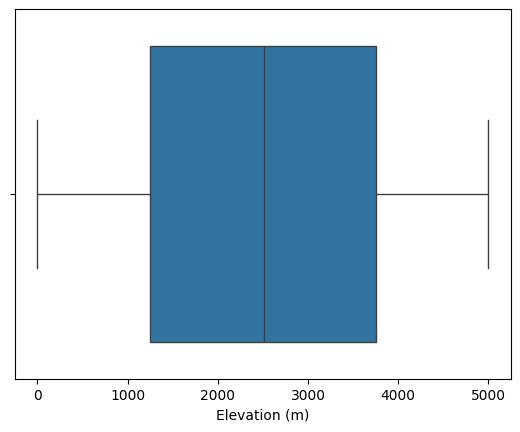

In [75]:
p1=sns.boxplot(x=data['Elevation (m)'])

In [93]:
outliers = data[(data['Elevation (m)'] > 2000) | (data['Elevation (m)']<3000)]

In [94]:
outliers ['Elevation (m)']

0         476.214325
1        1656.296531
2        2597.677830
3        4567.102082
4         945.983920
            ...     
65445     619.264560
65446    1911.577267
65447    2446.102138
65448    3188.839480
65449    3183.600750
Name: Elevation (m), Length: 65450, dtype: float64

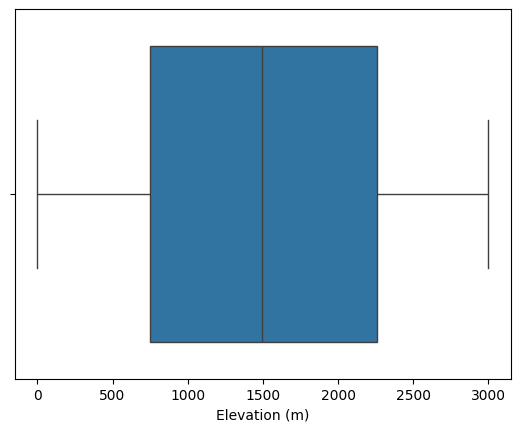

In [103]:
data2=data[(data['Elevation (m)']<=3000)]
p1=sns.boxplot(x=data2['Elevation (m)'])
        

R2 Score: -0.00


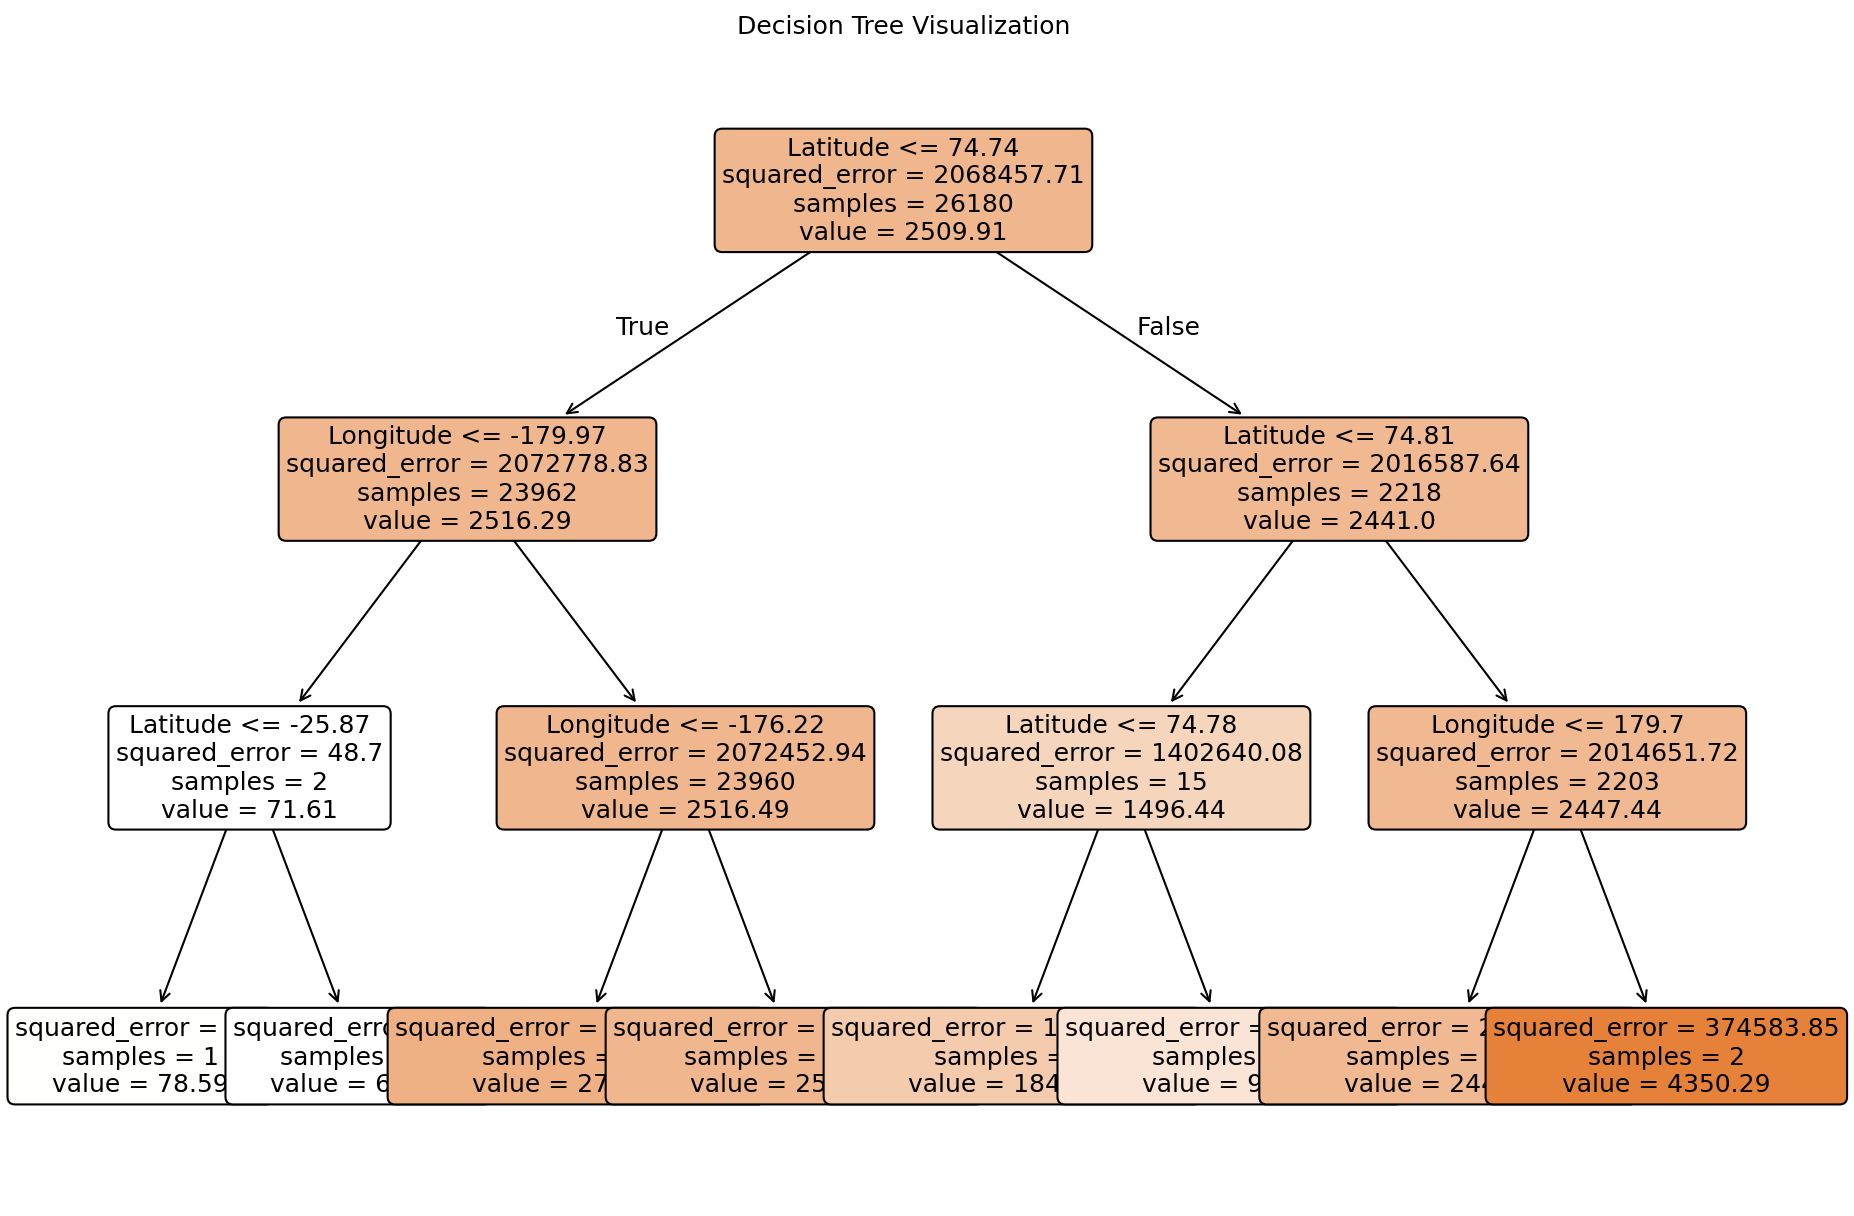

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import plot_tree

data = pd.read_csv('Location Intelligence Cybersecurity 2025.csv')

selected_features = ['Latitude', 'Longitude']
X = data[selected_features]
y = data['Elevation (m)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=1)

model = DecisionTreeRegressor(max_depth=3)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
score = metrics.r2_score(y_test, y_pred)
print(f"R2 Score: {score:.2f}")

plt.figure(figsize=(15, 10), dpi=150)
plot_tree(model, 
          filled=True, 
          feature_names=selected_features, 
          rounded=True, 
          precision=2, 
          fontsize=12)

plt.title("Decision Tree Visualization")
plt.show()

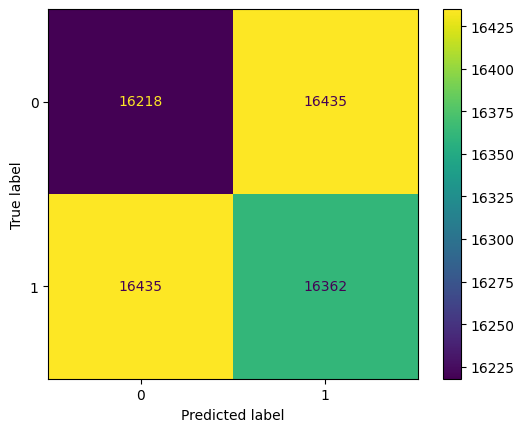

In [29]:
from sklearn import metrics
data = pd.read_csv('Location Intelligence Cybersecurity 2025.csv')
avg_elevation = data['Elevation (m)'].mean()
actual = (data['Elevation (m)'] > avg_elevation).astype(int)
predicted = actual.sample(frac=1, random_state=1).values 
confusion_matrix = metrics.confusion_matrix(actual, predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
cm_display.plot()
plt.show()

R-Squared Score: -0.0037
Predicted Elevation: 2497.79 meters


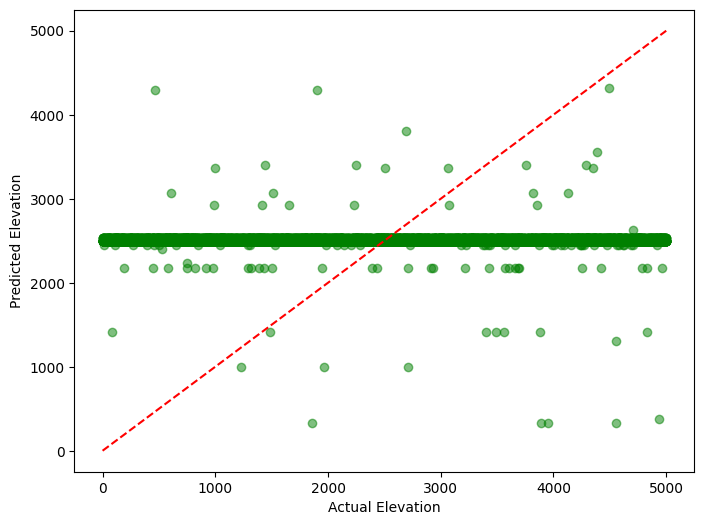

In [45]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
data = pd.read_csv('Location Intelligence Cybersecurity 2025.csv')
X = data[['Latitude', 'Longitude']]
y = data['Elevation (m)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = DecisionTreeRegressor(max_depth=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"R-Squared Score: {metrics.r2_score(y_test, y_pred):.4f}")
new_data = pd.DataFrame([[30.0444, 31.2357]], columns=['Latitude', 'Longitude'])
prediction = model.predict(new_data)
print(f"Predicted Elevation: {prediction[0]:.2f} meters")
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='green')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Elevation")
plt.ylabel("Predicted Elevation")
plt.show()

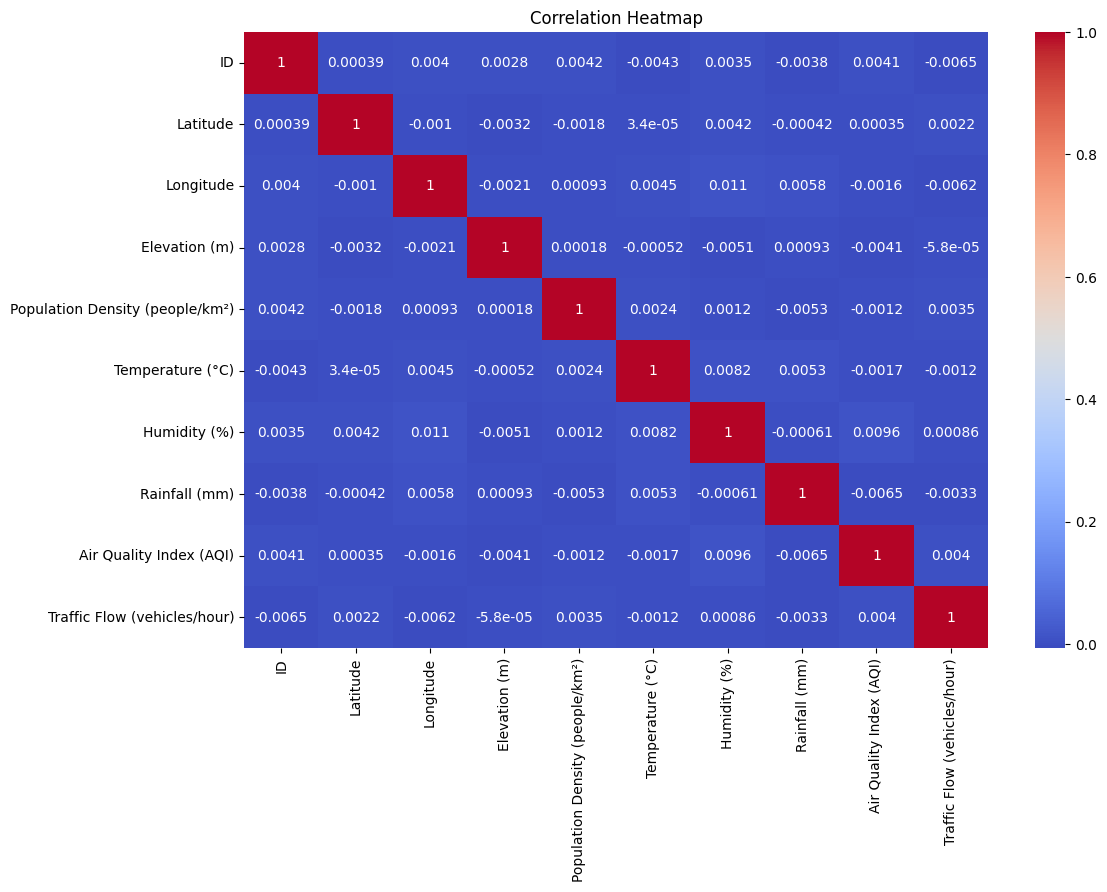

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv('Location Intelligence Cybersecurity 2025.csv')
data.corr(numeric_only=True)

plt.figure(figsize=(12, 8))
sns.heatmap(
    data.corr(numeric_only=True),
    annot=True,
    cmap='coolwarm'
)
plt.title('Correlation Heatmap')
plt.show()